<a href="https://colab.research.google.com/github/mixhub10/C4_project/blob/kmj/%EC%A2%85%ED%95%A9%EC%8B%A4%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[종합실습] 후판공장 scale 불량



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 데이터 scaling
from sklearn.preprocessing import StandardScaler

In [2]:
# import matplotlib as mpl

# import matplotlib.pyplot as plt
# mpl.rcParams['axes.unicode_minus'] = False
# plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
!pip install matplotlib -U
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
import matplotlib.pyplot as plt # 다운 받은 글꼴 plt에 적용
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DA_project/종합실습(데이터분석)/SCALE불량.csv', encoding = 'euc-kr')
df = df.drop(['plate_no','rolling_date'], axis = 1)

In [6]:
df

,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,양품,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,양품,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,양품,BV-A,프랑스,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
996,양품,LR-A,영국,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
997,양품,AB/AH32,미국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
998,양품,NV-A32,영국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


In [7]:
# con = (df['hsb'] == '미적용')
# df = df[df['hsb'] != '미적용']
# df

# 데이터 강종별 분리
- T or C

## 강종(Steel_kind) - T

In [8]:
df_T = df[df['steel_kind'] == 'T']
df_T

,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,양품,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,양품,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,양품,AB/EH36-TM,미국,T,77,2600,7900,적용,2호기,1열,1103,68,1122,143,300,1122,TMCP(온도제어),848,6,3조
619,양품,BV-AH36-TL,프랑스,T,74,1800,10000,적용,2호기,2열,1144,102,1123,139,337,1123,CR(제어압연),814,6,3조
620,양품,COMMON,공통,T,76,1800,16700,적용,3호기,1열,1124,77,1127,143,326,1127,CR(제어압연),811,6,3조
621,불량,BV-AH36-TL,프랑스,T,76,1800,9800,미적용,3호기,2열,1123,55,1135,104,217,1135,CR(제어압연),811,6,3조


### 요약 통계량

In [9]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 622
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            245 non-null    object
 1   spec_long        245 non-null    object
 2   spec_country     245 non-null    object
 3   steel_kind       245 non-null    object
 4   pt_thick         245 non-null    int64 
 5   pt_width         245 non-null    int64 
 6   pt_length        245 non-null    int64 
 7   hsb              245 non-null    object
 8   fur_no           245 non-null    object
 9   fur_input_row    245 non-null    object
 10  fur_heat_temp    245 non-null    int64 
 11  fur_heat_time    245 non-null    int64 
 12  fur_soak_temp    245 non-null    int64 
 13  fur_soak_time    245 non-null    int64 
 14  fur_total_time   245 non-null    int64 
 15  fur_ex_temp      245 non-null    int64 
 16  rolling_method   245 non-null    object
 17  rolling_temp     245 non-null    in

In [10]:
df_T.describe()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,52.461224,2638.367347,17428.979592,1138.832653,95.955102,1127.253061,89.420408,266.559184,1127.253061,849.693878,6.448980
std,17.173522,461.995613,7732.485297,17.519794,25.268436,8.185931,23.343277,32.308096,8.185931,117.616040,0.988898
min,13.000000,1800.000000,7900.000000,1103.000000,55.000000,1113.000000,48.000000,192.000000,1113.000000,0.000000,5.000000
25%,40.000000,2300.000000,12000.000000,1127.000000,74.000000,1123.000000,72.000000,244.000000,1123.000000,839.000000,6.000000
50%,50.000000,2500.000000,15900.000000,1137.000000,94.000000,1126.000000,86.000000,263.000000,1126.000000,856.000000,6.000000
75%,68.000000,3100.000000,21800.000000,1149.000000,116.000000,1129.000000,105.000000,286.000000,1129.000000,888.000000,6.000000
max,90.000000,4100.000000,54500.000000,1200.000000,158.000000,1165.000000,145.000000,351.000000,1165.000000,1057.000000,10.000000


### 데이터 정제

#### 결측값 확인

In [11]:
df_T.isnull().sum()

scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

#### 이상치 확인

##### 연속형 데이터

In [12]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 622
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            245 non-null    object
 1   spec_long        245 non-null    object
 2   spec_country     245 non-null    object
 3   steel_kind       245 non-null    object
 4   pt_thick         245 non-null    int64 
 5   pt_width         245 non-null    int64 
 6   pt_length        245 non-null    int64 
 7   hsb              245 non-null    object
 8   fur_no           245 non-null    object
 9   fur_input_row    245 non-null    object
 10  fur_heat_temp    245 non-null    int64 
 11  fur_heat_time    245 non-null    int64 
 12  fur_soak_temp    245 non-null    int64 
 13  fur_soak_time    245 non-null    int64 
 14  fur_total_time   245 non-null    int64 
 15  fur_ex_temp      245 non-null    int64 
 16  rolling_method   245 non-null    object
 17  rolling_temp     245 non-null    in

> pt_thick

Text(0.5, 1.0, 'hist')

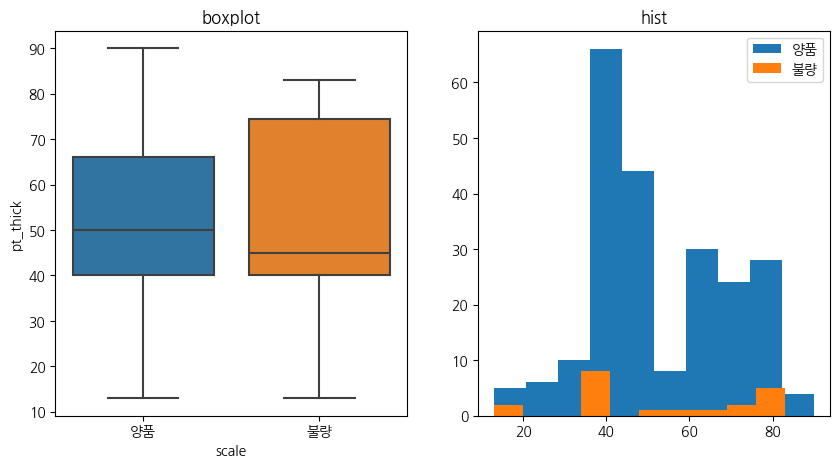

In [13]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'pt_thick', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['pt_thick'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['pt_thick'], label = '불량')
plt.legend()
plt.title('hist')

- 후판 기준 6mm~ 100mm 사이
- 위 후판 두께는 정상 기준치

>pt_width

Text(0.5, 1.0, 'hist')

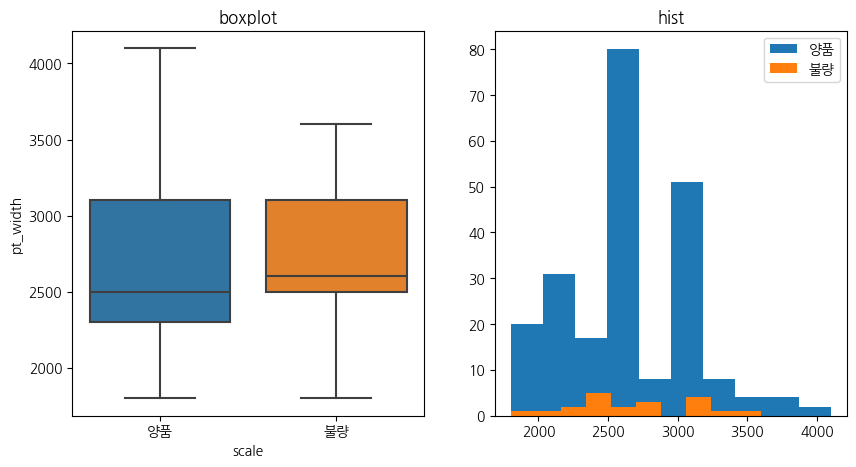

In [14]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'pt_width', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['pt_width'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['pt_width'], label = '불량')
plt.legend()
plt.title('hist')

- 1500mm ~ 5300mm 너비 기준치


> pt_length

Text(0.5, 1.0, 'hist')

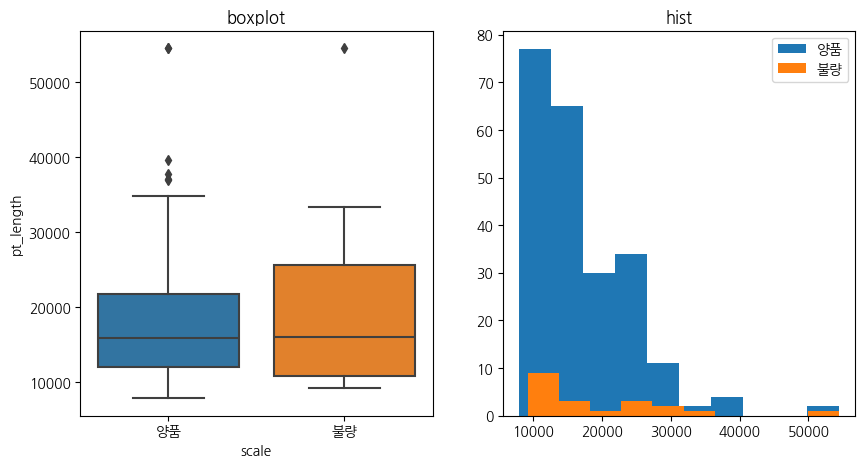

In [15]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'pt_length', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['pt_length'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['pt_length'], label = '불량')
plt.legend()
plt.title('hist')

In [16]:
df_T[df_T['pt_length'] > 50000]

,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
501,불량,LR-EH32-TM,영국,T,13,2600,54500,미적용,3호기,1열,1174,55,1165,75,230,1165,TMCP(온도제어),880,10,2조
502,양품,NV-E32-TM,영국,T,13,2500,54500,적용,3호기,2열,1169,56,1163,74,209,1163,TMCP(온도제어),889,10,2조
503,양품,NV-E32-TM,영국,T,14,2500,54500,적용,1호기,1열,1129,116,1130,73,282,1130,TMCP(온도제어),892,10,2조


In [17]:
df_T = df_T[df_T['pt_length'] < 50000]

Text(0.5, 1.0, 'hist')

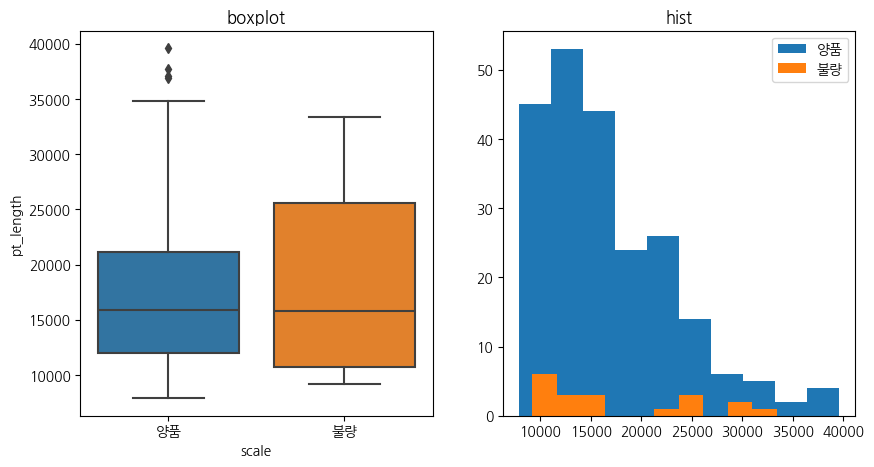

In [18]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'pt_length', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['pt_length'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['pt_length'], label = '불량')
plt.legend()
plt.title('hist')

> fur_heat_temp    
-후판 압연에 있어서 가열의 의미는 1차로 소재를 열간 압연이 가능한 온도까지 승온시키는 것이다. 이에 따라, 일반 강에 대한 가열온도는 압연기의 능력, 제품의 치수 및 압연 능률(ton/hour) 등에 따라 변하지만, 통상 1100~1250℃ 정도이다

Text(0.5, 1.0, 'hist')

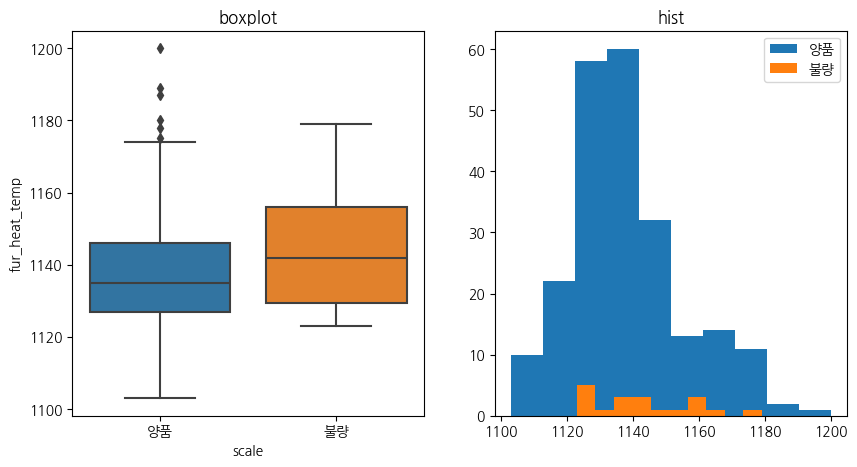

In [19]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_heat_temp', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['fur_heat_temp'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['fur_heat_temp'], label = '불량')
plt.legend()
plt.title('hist')

> fur_heat_time    

Text(0.5, 1.0, 'hist')

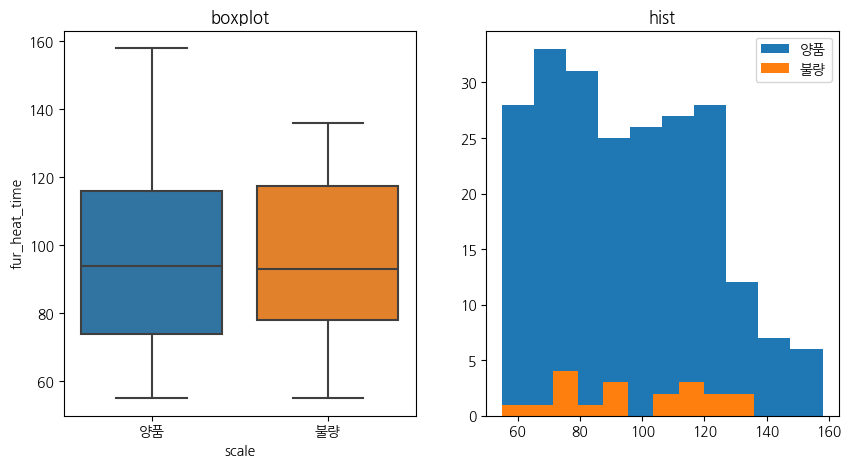

In [20]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_heat_time', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['fur_heat_time'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['fur_heat_time'], label = '불량')
plt.legend()
plt.title('hist')

> fur_soak_temp    

Text(0.5, 1.0, 'hist')

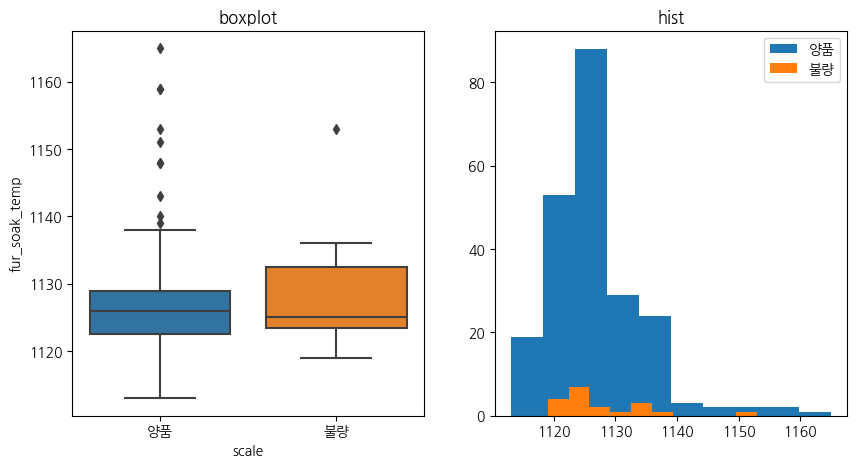

In [21]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_soak_temp', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['fur_soak_temp'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['fur_soak_temp'], label = '불량')
plt.legend()
plt.title('hist')

> fur_soak_time    

Text(0.5, 1.0, 'hist')

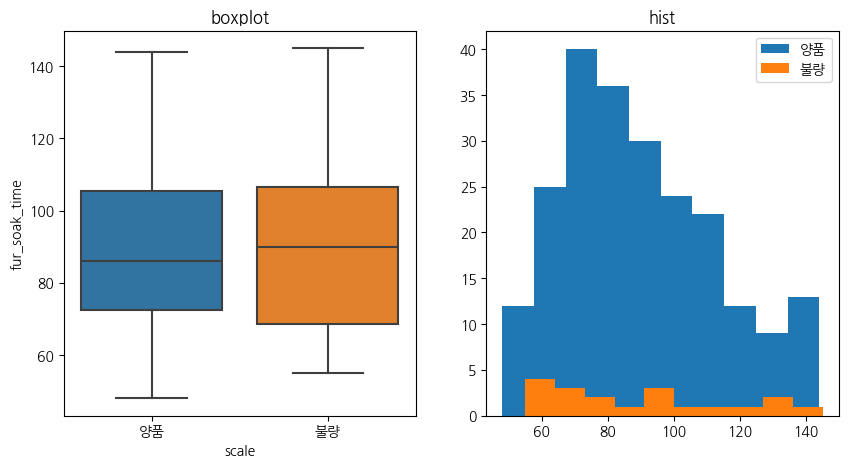

In [22]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_soak_time', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['fur_soak_time'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['fur_soak_time'], label = '불량')
plt.legend()
plt.title('hist')

> fur_total_time   

Text(0.5, 1.0, 'hist')

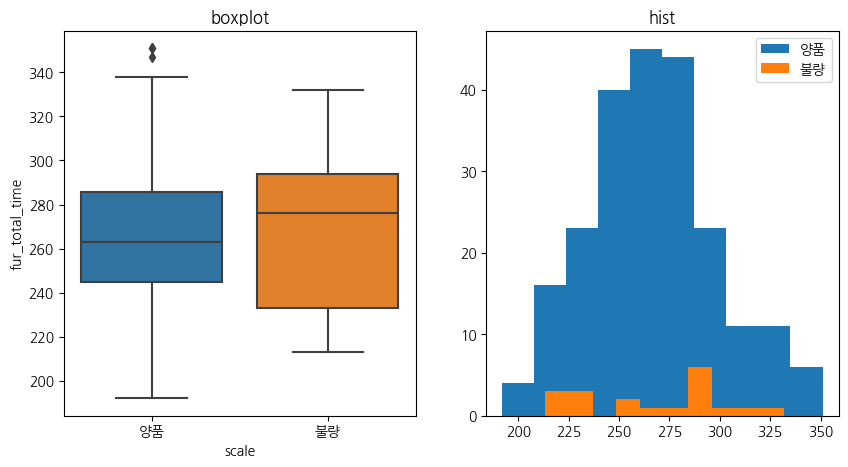

In [23]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_total_time', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['fur_total_time'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['fur_total_time'], label = '불량')
plt.legend()
plt.title('hist')

> fur_ex_temp      

Text(0.5, 1.0, 'hist')

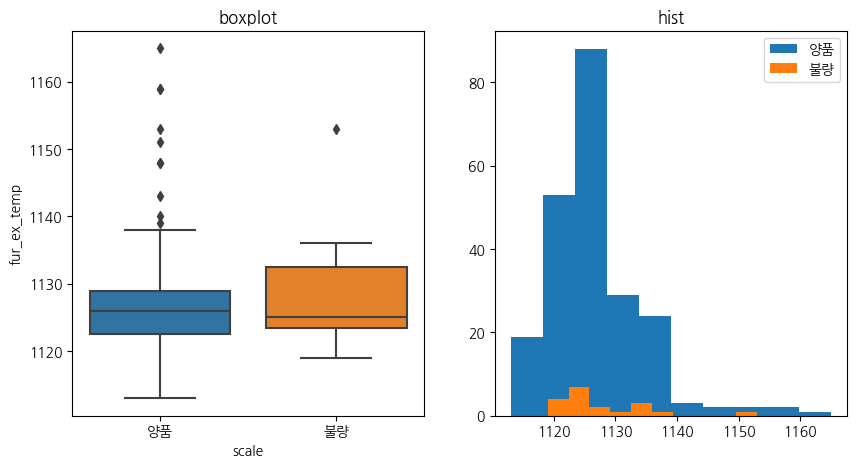

In [24]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_ex_temp', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['fur_ex_temp'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['fur_ex_temp'], label = '불량')
plt.legend()
plt.title('hist')

> rolling_temp

Text(0.5, 1.0, 'hist')

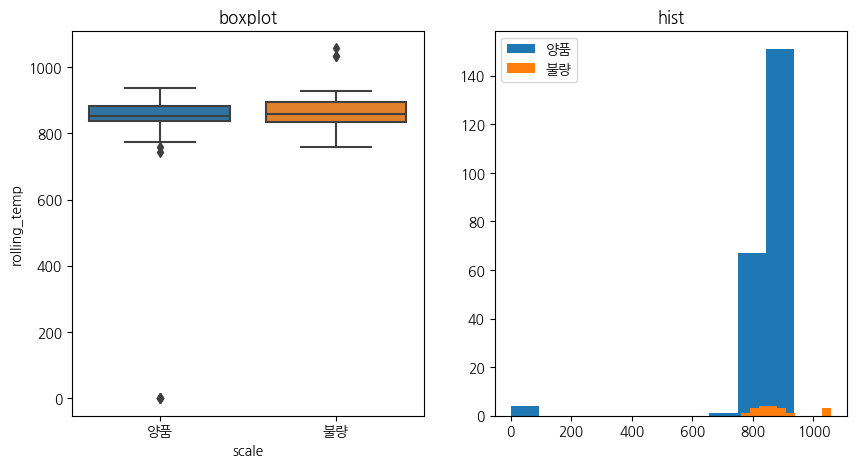

In [25]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'rolling_temp', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['rolling_temp'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['rolling_temp'], label = '불량')
plt.legend()
plt.title('hist')

In [26]:
df_T = df_T[df_T['rolling_temp'] > 200 ]

Text(0.5, 1.0, 'hist')

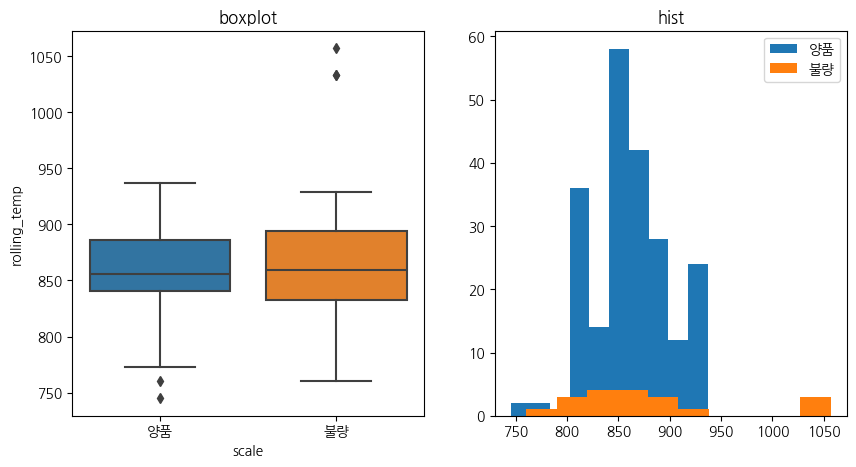

In [27]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'rolling_temp', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['rolling_temp'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['rolling_temp'], label = '불량')
plt.legend()
plt.title('hist')

In [28]:
df_T[(df_T['scale'] == '양품') & (df['rolling_temp'] >1000)]

<ipython-input-28-e4e1301c9eef>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_T[(df_T['scale'] == '양품') & (df['rolling_temp'] >1000)]


,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group


In [29]:
df_T[(df_T['scale'] == '불량') & (df['rolling_temp'] >1000)]

<ipython-input-29-238c26c5adfa>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_T[(df_T['scale'] == '불량') & (df['rolling_temp'] >1000)]


,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
15,불량,COMMON,공통,T,38,3100,16200,적용,3호기,2열,1131,120,1125,68,259,1125,CR(제어압연),1057,8,1조
547,불량,COMMON,공통,T,40,2500,28600,적용,3호기,1열,1162,116,1124,98,291,1124,CR(제어압연),1033,6,2조
548,불량,GL-D36-TM,독일,T,40,2500,28600,미적용,3호기,1열,1162,116,1124,98,314,1124,TMCP(온도제어),1033,6,2조


In [30]:
df_T = df_T[df['rolling_temp'] <1000]

<ipython-input-30-e729c4780de5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_T = df_T[df['rolling_temp'] <1000]


Text(0.5, 1.0, 'hist')

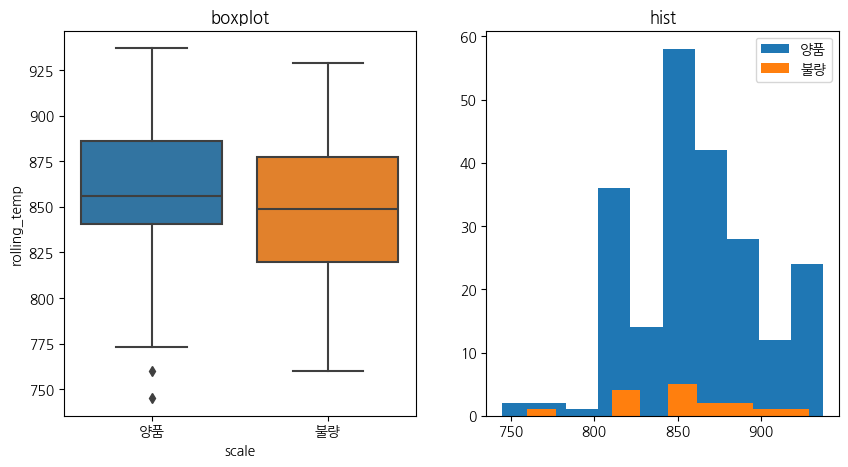

In [31]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'rolling_temp', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['rolling_temp'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['rolling_temp'], label = '불량')
plt.legend()
plt.title('hist')

> descaling_count  

Text(0.5, 1.0, 'hist')

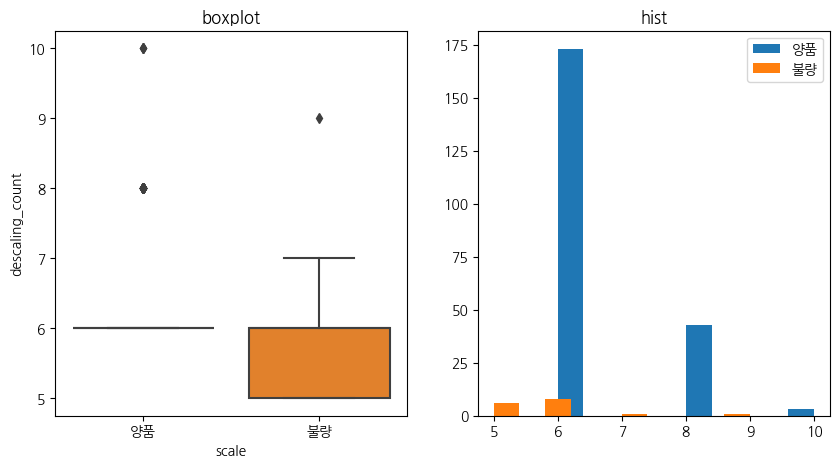

In [32]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'descaling_count', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['descaling_count'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['descaling_count'], label = '불량')
plt.legend()
plt.title('hist')

In [33]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 622
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            235 non-null    object
 1   spec_long        235 non-null    object
 2   spec_country     235 non-null    object
 3   steel_kind       235 non-null    object
 4   pt_thick         235 non-null    int64 
 5   pt_width         235 non-null    int64 
 6   pt_length        235 non-null    int64 
 7   hsb              235 non-null    object
 8   fur_no           235 non-null    object
 9   fur_input_row    235 non-null    object
 10  fur_heat_temp    235 non-null    int64 
 11  fur_heat_time    235 non-null    int64 
 12  fur_soak_temp    235 non-null    int64 
 13  fur_soak_time    235 non-null    int64 
 14  fur_total_time   235 non-null    int64 
 15  fur_ex_temp      235 non-null    int64 
 16  rolling_method   235 non-null    object
 17  rolling_temp     235 non-null    in

##### 범주형 데이터

> scale

<Axes: xlabel='scale', ylabel='count'>

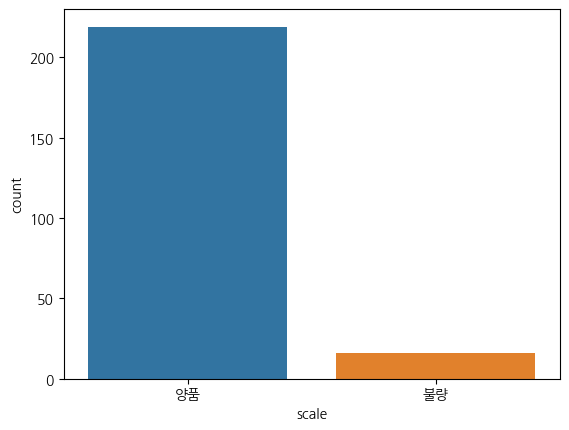

In [34]:
sns.countplot(x = 'scale', data = df_T)

> spec_country

In [35]:
df_T["spec_country"].value_counts()

프랑스    54
독일     44
한국     41
미국     37
공통     34
영국     21
일본      4
Name: spec_country, dtype: int64

> hsb

<Axes: xlabel='hsb', ylabel='count'>

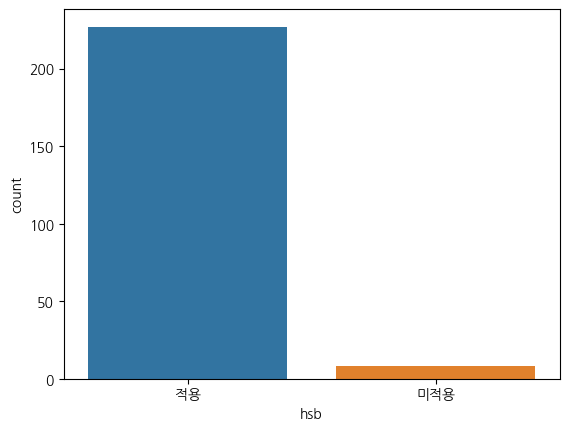

In [36]:
sns.countplot(x = 'hsb', data = df_T)

> fur_no

<Axes: xlabel='fur_no', ylabel='count'>

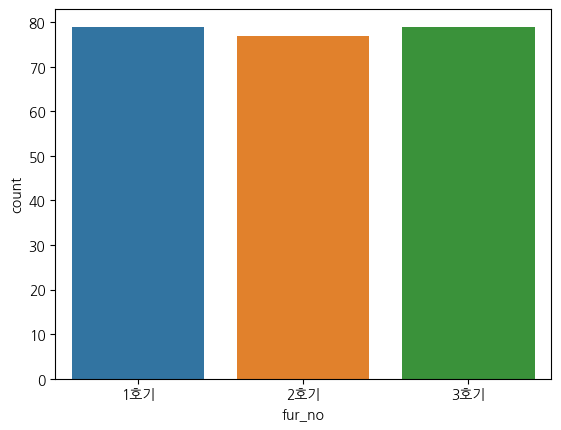

In [37]:
sns.countplot(x = 'fur_no', data = df_T)

### 탐색적 분석

In [38]:
df_T['scale'] = df_T['scale'].map({'양품': 1, '불량':0})

In [39]:
df_T.corr()

<ipython-input-39-f4511b77a046>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_T.corr()


,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
scale,1.000000,-0.073363,-0.024710,0.021302,-0.044007,0.013337,-0.047589,-0.010269,0.018604,-0.047589,0.075673,0.157587
pt_thick,-0.073363,1.000000,-0.239786,-0.750957,-0.376384,0.187647,-0.228786,-0.077109,0.075109,-0.228786,-0.265495,-0.592658
pt_width,-0.024710,-0.239786,1.000000,-0.221867,0.101464,-0.161902,0.186204,-0.094346,-0.186815,0.186204,-0.075964,0.339700
pt_length,0.021302,-0.750957,-0.221867,1.000000,0.322514,-0.092940,0.184036,0.076317,-0.000576,0.184036,0.190074,0.387472
fur_heat_temp,-0.044007,-0.376384,0.101464,0.322514,1.000000,0.014894,0.616996,0.022877,0.021363,0.616996,0.062989,0.218269
fur_heat_time,0.013337,0.187647,-0.161902,-0.092940,0.014894,1.000000,-0.188044,-0.332977,0.509123,-0.188044,0.206351,-0.101777
fur_soak_temp,-0.047589,-0.228786,0.186204,0.184036,0.616996,-0.188044,1.000000,-0.354146,-0.410536,1.000000,0.059742,0.396886
fur_soak_time,-0.010269,-0.077109,-0.094346,0.076317,0.022877,-0.332977,-0.354146,1.000000,0.519171,-0.354146,-0.230474,-0.353192
fur_total_time,0.018604,0.075109,-0.186815,-0.000576,0.021363,0.509123,-0.410536,0.519171,1.000000,-0.410536,-0.007701,-0.309153
fur_ex_temp,-0.047589,-0.228786,0.186204,0.184036,0.616996,-0.188044,1.000000,-0.354146,-0.410536,1.000000,0.059742,0.396886


#### 그룹조별 불량 개수

In [40]:
df_T[(df_T['scale'] == 0) & (df_T['work_group'] =='1조')]

,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
9,0,AB/EH36-TM,미국,T,38,3100,16200,적용,2호기,2열,1135,119,1124,73,290,1124,TMCP(온도제어),881,7,1조
20,0,GL-E32-TM,독일,T,50,2200,21800,적용,3호기,1열,1127,127,1123,71,286,1123,TMCP(온도제어),929,5,1조
497,0,GL-A32-TM,독일,T,13,3300,33400,적용,1호기,1열,1179,66,1153,57,224,1153,TMCP(온도제어),863,9,1조


In [41]:
df_T[(df_T['scale'] == 0) & (df_T['work_group'] =='2조')]

,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
80,0,COMMON,공통,T,66,2500,12000,적용,1호기,1열,1142,110,1134,73,276,1134,CR(제어압연),851,5,2조
94,0,BV-EH36-TM,프랑스,T,74,2700,11000,미적용,3호기,2열,1142,93,1134,61,235,1134,TMCP(온도제어),847,6,2조
101,0,BV-EH36-TM,프랑스,T,76,2700,9700,적용,3호기,2열,1123,79,1126,61,231,1126,TMCP(온도제어),760,5,2조
105,0,GL-E36-TM,독일,T,76,2500,9200,미적용,1호기,2열,1142,82,1131,69,213,1131,TMCP(온도제어),847,6,2조
112,0,AB/EH36-TM,미국,T,83,2600,10400,미적용,1호기,2열,1124,77,1124,99,250,1124,TMCP(온도제어),846,6,2조
527,0,NV-A32-TM,영국,T,40,2800,26000,적용,3호기,2열,1164,77,1136,90,227,1136,TMCP(온도제어),897,5,2조
538,0,GL-D36-TM,독일,T,40,2500,25600,미적용,2호기,1열,1149,73,1119,131,296,1119,TMCP(온도제어),818,6,2조
557,0,NV-D36-TM,영국,T,40,2300,25500,적용,3호기,2열,1161,105,1125,122,293,1125,TMCP(온도제어),820,5,2조


In [42]:
df_T[(df_T['scale'] == 0) & (df_T['work_group'] =='3조')]

,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
572,0,PILAC-BT33,한국,T,55,3100,13400,미적용,2호기,2열,1151,136,1122,109,303,1122,CR(제어압연),892,6,3조
595,0,PILAC-BT33,한국,T,81,2100,13200,미적용,1호기,2열,1138,131,1128,55,271,1128,CR(제어압연),876,6,3조
609,0,BV-AH36-TM,프랑스,T,40,3100,15800,적용,2호기,2열,1135,93,1119,134,295,1119,TMCP(온도제어),812,5,3조
612,0,A131-DH36TM,미국,T,71,3600,9200,미적용,2호기,2열,1128,92,1121,145,332,1121,CR(제어압연),859,6,3조
621,0,BV-AH36-TL,프랑스,T,76,1800,9800,미적용,3호기,2열,1123,55,1135,104,217,1135,CR(제어압연),811,6,3조


- 2조 그룹이 불량률이 더 높음

#### 가설 검정
- 카이제곱 검정 : 목표변수와 독립변수간의 관계
- 상관분석 : 목표변수와 설명변수 간 상관성

In [43]:
# 가설검정 및 통계 분석 패키지
import scipy.stats as stats
from statsmodels.formula.api import ols

> 카이제곱 검정
- 범주형 목표변수와 범주형 설명변수 간의 상관성 유의한지

In [44]:
df_T.columns

Index(['scale', 'spec_long', 'spec_country', 'steel_kind', 'pt_thick',
       'pt_width', 'pt_length', 'hsb', 'fur_no', 'fur_input_row',
       'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time',
       'fur_total_time', 'fur_ex_temp', 'rolling_method', 'rolling_temp',
       'descaling_count', 'work_group'],
      dtype='object')

In [45]:
df_T_char = df_T.select_dtypes(include = "object")
df_T_char.head()

,spec_long,spec_country,steel_kind,hsb,fur_no,fur_input_row,rolling_method,work_group
0,AB/EH32-TM,미국,T,적용,1호기,1열,TMCP(온도제어),1조
1,AB/EH32-TM,미국,T,적용,1호기,2열,TMCP(온도제어),1조
2,NV-E36-TM,영국,T,적용,2호기,1열,TMCP(온도제어),1조
3,NV-E36-TM,영국,T,적용,2호기,2열,TMCP(온도제어),1조
4,BV-EH36-TM,프랑스,T,적용,3호기,1열,TMCP(온도제어),1조


In [46]:
cross_tab = pd.crosstab(df_T['scale'], [df_T_char['spec_country'],df_T_char['fur_no'], df_T_char['fur_input_row'], df_T_char['rolling_method'], df_T_char['work_group'] ])
cross_tab

spec_country         공통                                                     \
fur_no              1호기                     2호기                     3호기      
fur_input_row        1열          2열          1열          2열          1열      
rolling_method CR(제어압연)    CR(제어압연)    CR(제어압연)    CR(제어압연)    CR(제어압연)      
work_group           1조 2조       1조 2조       1조 2조       1조 2조       1조 2조   
scale                                                                        
0                     0  1        0  0        0  0        0  0        0  0   
1                     3  0        4  2        3  1        2  3        3  3   

spec_country    ...       한국                                                  \
fur_no          ...      1호기         2호기                        3호기            
fur_input_row   ...       2열          1열             2열          1열       2열   
rolling_method  ... CR(제어압연)    CR(제어압연)       CR(제어압연)    CR(제어압연) CR(제어압연)   
work_group      ...       2조 3조       1조 2조 3조       2조 3조       3조       2조   
scale           ...                                                            
0               ...        0  1        0  0  0        0  1        0        0   
1               ...        4  4        1  5  4        3  3        3        1   

spec_country       
fur_no             
fur_input_row      
rolling_method     
work_group     3조  
scale              
0               0  
1               4  

[2 rows x 93 columns]

In [47]:
chi, pval, dof, expected = stats.chi2_contingency(cross_tab)
chi, pval, dof

(116.53312880517504, 0.04297567083522081, 92)

In [48]:
# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(1)))

chi-square test 
 chisq: 116.53
 p-value : 0.043
 degree of freedom: 92
 expected value: 
[[0.2 0.1 0.3 0.1 0.2 0.1 0.1 0.2 0.2 0.2 0.1 0.1 0.3 0.1 0.2 0.2 0.1 0.3
  0.1 0.2 0.3 0.1 0.2 0.1 0.2 0.3 0.1 0.4 0.1 0.3 0.1 0.1 0.2 0.1 0.1 0.1
  0.1 0.1 0.1 0.1 0.2 0.1 0.1 0.2 0.3 0.1 0.2 0.1 0.1 0.1 0.1 0.2 0.1 0.3
  0.1 0.1 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.2 0.4 0.1 0.3 0.3 0.1 0.3 0.1 0.1
  0.1 0.4 0.1 0.1 0.3 0.1 0.1 0.1 0.3 0.1 0.3 0.3 0.3 0.1 0.3 0.3 0.2 0.3
  0.2 0.1 0.3]
 [2.8 0.9 3.7 1.9 2.8 0.9 1.9 2.8 2.8 2.8 0.9 0.9 4.7 1.9 2.8 2.8 1.9 4.7
  0.9 2.8 4.7 0.9 2.8 1.9 2.8 3.7 1.9 5.6 0.9 3.7 1.9 0.9 2.8 1.9 0.9 1.9
  1.9 0.9 0.9 0.9 2.8 1.9 0.9 2.8 3.7 0.9 2.8 0.9 0.9 1.9 1.9 2.8 0.9 3.7
  0.9 0.9 2.8 1.9 0.9 0.9 0.9 0.9 0.9 2.8 5.6 0.9 4.7 4.7 1.9 4.7 0.9 0.9
  0.9 5.6 0.9 1.9 3.7 1.9 0.9 1.9 4.7 1.9 4.7 3.7 4.7 0.9 4.7 3.7 2.8 3.7
  2.8 0.9 3.7]]


> 범주형 설명변수의 유의성
- 유의함 : spec_long
- 유의하지 않음: spec_country,fur_no,fur_input_row,rolling_method, work_group

In [49]:
# 각각의 상관성

#spec_country
cross_tab1 = pd.crosstab(df_T['scale'], df_T_char['spec_country'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab1)
print( "spec_country chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
#fur_no
cross_tab2 = pd.crosstab(df_T['scale'], df_T_char['fur_no'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab2)
print( "fur_no chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
#fur_input_row
cross_tab3 = pd.crosstab(df_T['scale'], df_T_char['fur_input_row'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab3)
print( "fur_input_row chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
#rolling_method
cross_tab4 = pd.crosstab(df_T['scale'], df_T_char['rolling_method'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab4)
print( "rolling_method chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()
#work_group
cross_tab5 = pd.crosstab(df_T['scale'], df_T_char['work_group'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab5)
print( "work_group chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()

#spec_long
cross_tab6 = pd.crosstab(df_T['scale'], df_T_char['spec_long'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab6)
print( "spec_long chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()

#hsb
cross_tab6 = pd.crosstab(df_T['scale'], df_T_char['hsb'])
chi, pval, dof, expected = stats.chi2_contingency(cross_tab6)
print( "hsb chi-square test ")
print( ' chisq: {0:0.2f}' .format(chi))
print( ' p-value : {0:0.3f}'.format(pval))
print( ' degree of freedom: {}' .format(dof))
print()

spec_country chi-square test 
 chisq: 2.07
 p-value : 0.913
 degree of freedom: 6

fur_no chi-square test 
 chisq: 0.12
 p-value : 0.943
 degree of freedom: 2

fur_input_row chi-square test 
 chisq: 3.10
 p-value : 0.078
 degree of freedom: 1

rolling_method chi-square test 
 chisq: 0.00
 p-value : 0.994
 degree of freedom: 1

work_group chi-square test 
 chisq: 1.73
 p-value : 0.420
 degree of freedom: 2

spec_long chi-square test 
 chisq: 43.31
 p-value : 0.018
 degree of freedom: 26

hsb chi-square test 
 chisq: 98.66
 p-value : 0.000
 degree of freedom: 1



> 상관분석
- 범주형 목표변수와 두개이상의 연속형 설명변수 선형, 비선형 관계 파악(피어슨)

In [50]:
df_T_num = df_T.select_dtypes(exclude = "object")
df_T_num.columns

Index(['scale', 'pt_thick', 'pt_width', 'pt_length', 'fur_heat_temp',
       'fur_heat_time', 'fur_soak_temp', 'fur_soak_time', 'fur_total_time',
       'fur_ex_temp', 'rolling_temp', 'descaling_count'],
      dtype='object')

In [51]:

# 변수명 저장
v_feature_names = df_T_num.columns

# # StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_T_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_T_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
0,1,32,3700,15100,1144,116,1133,59,259,1133,934,8
1,1,32,3700,15100,1144,122,1135,53,238,1135,937,8
2,1,33,3600,19200,1129,116,1121,55,258,1121,889,8
3,1,33,3600,19200,1152,125,1127,68,266,1127,885,8
4,1,38,3100,13300,1140,134,1128,48,246,1128,873,8


'Scale 변환 후:'

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
0,0.270295,-1.258059,2.303563,-0.275813,0.310285,0.792829,0.787188,-1.319538,-0.253986,0.787188,1.908122,1.739177
1,0.270295,-1.258059,2.303563,-0.275813,0.310285,1.029921,1.051458,-1.575072,-0.908856,1.051458,1.986795,1.739177
2,0.270295,-1.197932,2.086420,0.351538,-0.552978,0.792829,-0.798433,-1.489894,-0.285170,-0.798433,0.728030,1.739177
3,0.270295,-1.197932,2.086420,0.351538,0.770691,1.148467,-0.005623,-0.936236,-0.035696,-0.005623,0.623133,1.739177
4,0.270295,-0.897297,1.000705,-0.551235,0.080081,1.504105,0.126512,-1.788018,-0.659382,0.126512,0.308442,1.739177


In [52]:
df_T_num.corr()

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
scale,1.000000,-0.073363,-0.024710,0.021302,-0.044007,0.013337,-0.047589,-0.010269,0.018604,-0.047589,0.075673,0.157587
pt_thick,-0.073363,1.000000,-0.239786,-0.750957,-0.376384,0.187647,-0.228786,-0.077109,0.075109,-0.228786,-0.265495,-0.592658
pt_width,-0.024710,-0.239786,1.000000,-0.221867,0.101464,-0.161902,0.186204,-0.094346,-0.186815,0.186204,-0.075964,0.339700
pt_length,0.021302,-0.750957,-0.221867,1.000000,0.322514,-0.092940,0.184036,0.076317,-0.000576,0.184036,0.190074,0.387472
fur_heat_temp,-0.044007,-0.376384,0.101464,0.322514,1.000000,0.014894,0.616996,0.022877,0.021363,0.616996,0.062989,0.218269
fur_heat_time,0.013337,0.187647,-0.161902,-0.092940,0.014894,1.000000,-0.188044,-0.332977,0.509123,-0.188044,0.206351,-0.101777
fur_soak_temp,-0.047589,-0.228786,0.186204,0.184036,0.616996,-0.188044,1.000000,-0.354146,-0.410536,1.000000,0.059742,0.396886
fur_soak_time,-0.010269,-0.077109,-0.094346,0.076317,0.022877,-0.332977,-0.354146,1.000000,0.519171,-0.354146,-0.230474,-0.353192
fur_total_time,0.018604,0.075109,-0.186815,-0.000576,0.021363,0.509123,-0.410536,0.519171,1.000000,-0.410536,-0.007701,-0.309153
fur_ex_temp,-0.047589,-0.228786,0.186204,0.184036,0.616996,-0.188044,1.000000,-0.354146,-0.410536,1.000000,0.059742,0.396886


> 목표변수에 대해연속형 변수들의 상관성
- 유의함 : descaling_count
- 유의하지않음 : 나머지 유의하지 않다고 함

In [53]:
# 피어슨 상관분석
correlation_matrix = df_T_num.corr()

# 상관계수 출력
print(correlation_matrix)
print()
# pt_thick p-value 출력
correlation, p_value = stats.pearsonr(df_T_num['scale'], df_T_num['pt_thick'])
print("pt_thick 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# pt_width p-value 출력
correlation, p_value = stats.pearsonr(df_T_num['scale'], df_T_num['pt_width'])
print("pt_width 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# pt_length p-value 출력
correlation, p_value = stats.pearsonr(df_T_num['scale'], df_T_num['pt_length'])
print("pt_length 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# fur_heat_temp p-value 출력
correlation, p_value = stats.pearsonr(df_T_num['scale'], df_T_num['fur_heat_temp'])
print("fur_heat_temp 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# fur_heat_time p-value 출력
correlation, p_value = stats.pearsonr(df_T_num['scale'], df_T_num['fur_heat_time'])
print("fur_heat_time 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# fur_soak_temp p-value 출력
correlation, p_value = stats.pearsonr(df_T_num['scale'], df_T_num['fur_soak_temp'])
print("fur_soak_temp 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# fur_soak_time p-value 출력
correlation, p_value = stats.pearsonr(df_T_num['scale'], df_T_num['fur_soak_time'])
print("fur_soak_time 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# fur_total_time p-value 출력
correlation, p_value = stats.pearsonr(df_T_num['scale'], df_T_num['fur_total_time'])
print("fur_total_time 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# fur_ex_temp p-value 출력
correlation, p_value = stats.pearsonr(df_T_num['scale'], df_T_num['fur_ex_temp'])
print("fur_ex_temp 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# rolling_temp p-value 출력
correlation, p_value = stats.pearsonr(df_T_num['scale'], df_T_num['rolling_temp'])
print("rolling_temp 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()
# descaling_count p-value 출력
correlation, p_value = stats.pearsonr(df_T_num['scale'], df_T_num['descaling_count'])
print("descaling_count 피어슨 상관계수")
print(f"Pearson Correlation: {correlation.round(3)}")
print(f"P-Value: {p_value.round(3)}")
print()

                    scale  pt_thick  pt_width  pt_length  fur_heat_temp  \
scale            1.000000 -0.073363 -0.024710   0.021302      -0.044007   
pt_thick        -0.073363  1.000000 -0.239786  -0.750957      -0.376384   
pt_width        -0.024710 -0.239786  1.000000  -0.221867       0.101464   
pt_length        0.021302 -0.750957 -0.221867   1.000000       0.322514   
fur_heat_temp   -0.044007 -0.376384  0.101464   0.322514       1.000000   
fur_heat_time    0.013337  0.187647 -0.161902  -0.092940       0.014894   
fur_soak_temp   -0.047589 -0.228786  0.186204   0.184036       0.616996   
fur_soak_time   -0.010269 -0.077109 -0.094346   0.076317       0.022877   
fur_total_time   0.018604  0.075109 -0.186815  -0.000576       0.021363   
fur_ex_temp     -0.047589 -0.228786  0.186204   0.184036       0.616996   
rolling_temp     0.075673 -0.265495 -0.075964   0.190074       0.062989   
descaling_count  0.157587 -0.592658  0.339700   0.387472       0.218269   

                 fur_hea

### 모델링

- 다중공산성 진단 : 모델링 파트에서 사용

#### 주성분 분석으로 pc변수 좀 만들어서 해볼까

In [54]:
# 212 Page
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib ;  import matplotlib.pyplot as plt
# 데이터 시각화:추세, 산점도 행렬
import seaborn as sns
# Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler

# 주성분 분석
from sklearn.decomposition import PCA
# 회귀분석
import statsmodels.api as sm
# 그래프 표시
%matplotlib inline

In [55]:
# 연속형 변수 찾아서 scaling 하고 주성분pc 변수만들어서 유의한 범주형 변수랑 결합해서 모델 한번 돌려보자

#### 로지스틱 회귀분석

In [56]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit
# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
df_T.columns

Index(['scale', 'spec_long', 'spec_country', 'steel_kind', 'pt_thick',
       'pt_width', 'pt_length', 'hsb', 'fur_no', 'fur_input_row',
       'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time',
       'fur_total_time', 'fur_ex_temp', 'rolling_method', 'rolling_temp',
       'descaling_count', 'work_group'],
      dtype='object')

- 회귀계수 검토

In [58]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df_T, # 데이터
                                     test_size = 0.3, # test 데이터의 비율
                                     )  # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (164, 20)
test data size : (71, 20)


In [59]:
df_train

,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
546,1,NV-D36-TM,영국,T,44,2200,22800,적용,1호기,2열,1149,82,1126,123,306,1126,TMCP(온도제어),816,6,2조
559,1,PILAC-BT33,한국,T,50,2500,10900,적용,2호기,1열,1164,149,1123,98,351,1123,CR(제어압연),888,6,2조
16,1,BV-AH32-TM,프랑스,T,30,1900,34800,적용,1호기,2열,1119,130,1120,65,289,1120,TMCP(온도제어),926,8,1조
104,1,GL-E36-TM,독일,T,76,2500,9200,적용,1호기,1열,1132,79,1127,83,232,1127,TMCP(온도제어),842,6,2조
5,1,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,2열,1143,127,1128,57,255,1128,TMCP(온도제어),874,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1,BV-EH36-TM,프랑스,T,71,2700,11000,적용,3호기,1열,1142,109,1130,73,266,1130,TMCP(온도제어),840,6,2조
524,1,BV-EH36-TM,프랑스,T,38,3100,13300,적용,2호기,2열,1151,61,1122,105,263,1122,TMCP(온도제어),880,8,2조
28,1,GL-E36-TM,독일,T,48,2100,24500,적용,3호기,2열,1118,71,1124,86,216,1124,TMCP(온도제어),832,6,1조
91,1,BV-EH36-TM,프랑스,T,74,2700,11000,적용,2호기,1열,1136,115,1126,55,272,1126,TMCP(온도제어),844,6,2조


> 다중공산성 확인

In [60]:
df_train_dum = df_train.drop(['spec_long'], axis = 1)
df_train_x = pd.get_dummies(df_train_dum)

In [61]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant

In [62]:
# 53 Page
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_xx = df_train_x.drop(['work_group_3조','spec_country_영국','hsb_미적용','fur_soak_temp','fur_no_1호기','rolling_method_TMCP(온도제어)','fur_input_row_2열','rolling_method_CR(제어압연)','steel_kind_T'], axis = 1)

# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_xx)
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
21,fur_input_row_1열,1.07
15,spec_country_일본,1.19
20,fur_no_3호기,1.47
19,fur_no_2호기,1.49
10,rolling_temp,1.85
12,spec_country_공통,2.76
3,pt_width,2.95
1,scale,3.13
23,work_group_2조,3.17
18,hsb_적용,3.18


In [63]:
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula("scale ~ fur_total_time + fur_heat_time + fur_heat_temp  + work_group_1조	+ work_group_2조 + spec_country_프랑스 + descaling_count + spec_country_독일 + spec_country_미국 + pt_width	+ spec_country_공통 + rolling_temp	+ fur_no_3호기	+ fur_no_2호기 + spec_country_일본	+ hsb_적용	+ fur_input_row_1열", df_train_xx)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 35


LinAlgError: ignored

In [ ]:
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula("scale ~ descaling_count ", df_train_xx)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

- 예측 성능 평가

In [ ]:
# 예측
# train 데이터 예측
y_pred_train = log_result.predict(df_train)
# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)  # 0.5 : “1/0” 판정 임계값(1 발생 확률) 변경 가능
print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["scale"],y_pred_train_class)),"\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head(),"\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["scale"],y_pred_test_class)),"\n")

In [ ]:
# 평가
# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["scale"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["scale"],y_pred_train_class)),"\n")
print(classification_report(df_train["scale"], y_pred_train_class, digits=3))

# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["scale"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["scale"],y_pred_test_class)),"\n")
print(classification_report(df_test["scale"], y_pred_test_class, digits=3))

In [ ]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")
# df_logistic_coef.plot.barh(y = "Coef", figsize=(10,6))

- ridge, lasso 회귀 모델 사용해서 다중 공산성 문제 해결 (회귀분석의 규제화 기법)

#### gradientBoosting

In [64]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
df_T

,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,1,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,1,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,1,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,1,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,1,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,1,AB/EH36-TM,미국,T,77,2600,7900,적용,2호기,1열,1103,68,1122,143,300,1122,TMCP(온도제어),848,6,3조
619,1,BV-AH36-TL,프랑스,T,74,1800,10000,적용,2호기,2열,1144,102,1123,139,337,1123,CR(제어압연),814,6,3조
620,1,COMMON,공통,T,76,1800,16700,적용,3호기,1열,1124,77,1127,143,326,1127,CR(제어압연),811,6,3조
621,0,BV-AH36-TL,프랑스,T,76,1800,9800,미적용,3호기,2열,1123,55,1135,104,217,1135,CR(제어압연),811,6,3조


In [66]:
df_T.columns

Index(['scale', 'spec_long', 'spec_country', 'steel_kind', 'pt_thick',
       'pt_width', 'pt_length', 'hsb', 'fur_no', 'fur_input_row',
       'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time',
       'fur_total_time', 'fur_ex_temp', 'rolling_method', 'rolling_temp',
       'descaling_count', 'work_group'],
      dtype='object')

In [102]:
df_raw_x = df_T[['pt_thick','descaling_count','rolling_temp','hsb','spec_long']]
df_raw_y = df_T['scale']
df_raw_x = pd.get_dummies(df_raw_x)

In [103]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (235, 32)
분할 후 설명변수 데이터 :Train (164, 32)   Test (71, 32)


In [104]:
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncust = GradientBoostingClassifier(random_state=1234)
gb_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncust.score (df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncust.score (df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [105]:
# 실행옵션 확인
print(gb_uncust.get_params().keys())
print(gb_uncust.get_params().values())

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values([0.0, 'friedman_mse', None, 0.1, 'log_loss', 3, None, None, 0.0, 1, 2, 0.0, 100, None, 1234, 1.0, 0.0001, 0.1, 0, False])


In [106]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# learning_rate 학습률 변경
para_lr = [lr * 0.1 for lr in range(1, 10)]
# para_lr = [lr * 0.02 for lr in range(1, 20)]   # 민감하게 변화하면 0.02 간격으로 확인

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

In [107]:
# LearningRate별 정확도
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,1.0,0.972
1,0.2,1.0,0.972
2,0.3,1.0,0.972
3,0.4,1.0,0.972
4,0.5,1.0,0.972
5,0.6,1.0,0.972
6,0.7,1.0,0.972
7,0.8,1.0,0.972
8,0.9,1.0,0.972


In [108]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate=0.2, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [109]:
# n_estimators별 정확도
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,1.0,0.972
1,20,1.0,0.972
2,30,1.0,0.972
3,40,1.0,0.972
4,50,1.0,0.972
5,60,1.0,0.972
6,70,1.0,0.972
7,80,1.0,0.972
8,90,1.0,0.972
9,100,1.0,0.972


In [75]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경. 1~10
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                            n_estimators=100, learning_rate=0.2, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [76]:
# max_depth별 정확도
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.988,0.887
1,2,0.994,0.887
2,3,0.994,0.901
3,4,0.994,0.901
4,5,0.994,0.901
5,6,0.994,0.901
6,7,0.994,0.901
7,8,0.994,0.901
8,9,0.994,0.901
9,10,0.994,0.901


In [77]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수. 20~100
para_split = [n_split * 10 for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split,
                                    max_depth=5, n_estimators=100, learning_rate=0.2, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [78]:
# min_samples_leaf별 정확도
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.994,0.873
1,30,0.994,0.873
2,40,0.994,0.887
3,50,0.994,0.887
4,60,0.994,0.887
5,70,0.994,0.887
6,80,0.994,0.887
7,90,0.994,0.887
8,100,0.994,0.887


In [79]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수. 5~50
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                                     max_depth=5, n_estimators=100, learning_rate=0.2, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [80]:
# min_samples_leaf별 정확도
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.994,0.887
1,10,0.970,0.845
2,15,0.970,0.845
3,20,0.970,0.859
4,25,0.970,0.845
5,30,0.963,0.845
6,35,0.963,0.845
7,40,0.957,0.873
8,45,0.957,0.873
9,50,0.957,0.873


In [81]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf=50, max_depth=5, n_estimators=100, learning_rate=0.2,
                                      random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# 예측
y_pred = gb_final.predict(df_test_x)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))

Train Accuracy: 0.957
Test Accuracy: 0.873

Test Confusion matrix: 
[[ 0  9]
 [ 0 62]]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         9
           1      0.873     1.000     0.932        62

    accuracy                          0.873        71
   macro avg      0.437     0.500     0.466        71
weighted avg      0.763     0.873     0.814        71



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------

## 강종(Stell_kind) - C

In [82]:
df_C = df[df['steel_kind'] == 'C']
df_C

,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
117,양품,BV-B,프랑스,C,20,3600,39300,적용,3호기,1열,1129,76,1126,118,297,1126,CR(제어압연),934,8,2조
118,양품,BV-B,프랑스,C,20,3600,39500,적용,3호기,2열,1140,68,1132,104,235,1132,CR(제어압연),911,8,2조
119,양품,AB/B,미국,C,17,3400,39600,적용,2호기,2열,1130,71,1130,112,240,1130,CR(제어압연),935,10,2조
120,양품,LR-B,영국,C,17,3400,39600,적용,2호기,2열,1130,71,1130,112,287,1130,CR(제어압연),935,10,2조
121,양품,JS-SM490YB,일본,C,14,3300,51200,적용,1호기,1열,1140,80,1131,117,286,1131,CR(제어압연),915,10,2조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,양품,BV-A,프랑스,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
996,양품,LR-A,영국,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
997,양품,AB/AH32,미국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
998,양품,NV-A32,영국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


In [83]:
df_C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 117 to 999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            755 non-null    object
 1   spec_long        755 non-null    object
 2   spec_country     755 non-null    object
 3   steel_kind       755 non-null    object
 4   pt_thick         755 non-null    int64 
 5   pt_width         755 non-null    int64 
 6   pt_length        755 non-null    int64 
 7   hsb              755 non-null    object
 8   fur_no           755 non-null    object
 9   fur_input_row    755 non-null    object
 10  fur_heat_temp    755 non-null    int64 
 11  fur_heat_time    755 non-null    int64 
 12  fur_soak_temp    755 non-null    int64 
 13  fur_soak_time    755 non-null    int64 
 14  fur_total_time   755 non-null    int64 
 15  fur_ex_temp      755 non-null    int64 
 16  rolling_method   755 non-null    object
 17  rolling_temp     755 non-null    

### 이상치제거

> pt_thick

Text(0.5, 1.0, 'hist')

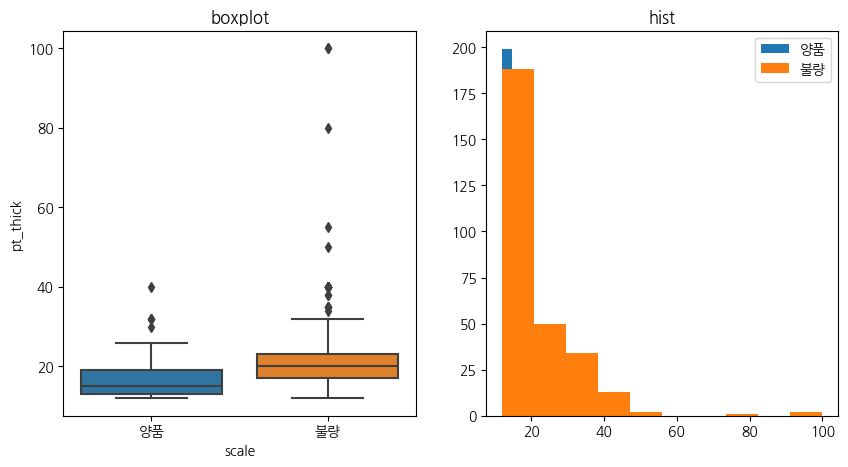

In [84]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'pt_thick', data = df_C)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_C[df_C['scale'] == '양품']['pt_thick'] , label = '양품')
plt.hist(df_C[df_C['scale'] == '불량']['pt_thick'], label = '불량')
plt.legend()
plt.title('hist')

In [85]:
df_C = df_C[df['pt_thick'] < 45]

<ipython-input-85-d94180b6eecb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_C = df_C[df['pt_thick'] < 45]


Text(0.5, 1.0, 'hist')

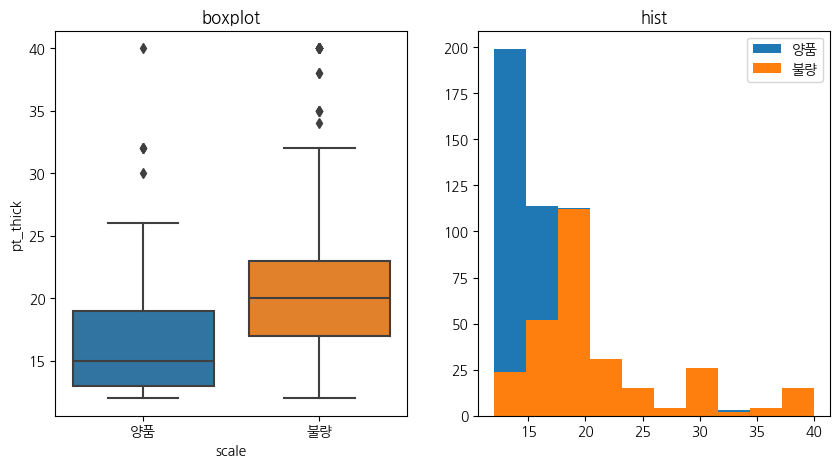

In [86]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'pt_thick', data = df_C)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_C[df_C['scale'] == '양품']['pt_thick'] , label = '양품')
plt.hist(df_C[df_C['scale'] == '불량']['pt_thick'], label = '불량')
plt.legend()
plt.title('hist')

> pt_width

Text(0.5, 1.0, 'hist')

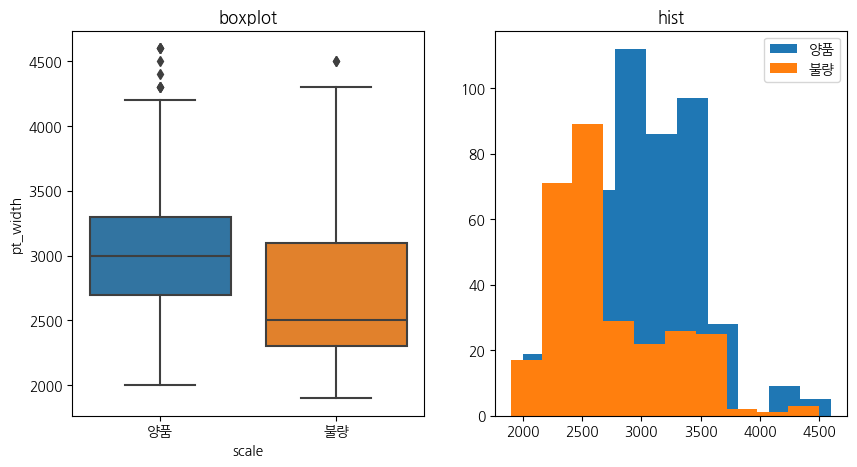

In [87]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'pt_width', data = df_C)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_C[df_C['scale'] == '양품']['pt_width'] , label = '양품')
plt.hist(df_C[df_C['scale'] == '불량']['pt_width'], label = '불량')
plt.legend()
plt.title('hist')

> pt_length

Text(0.5, 1.0, 'hist')

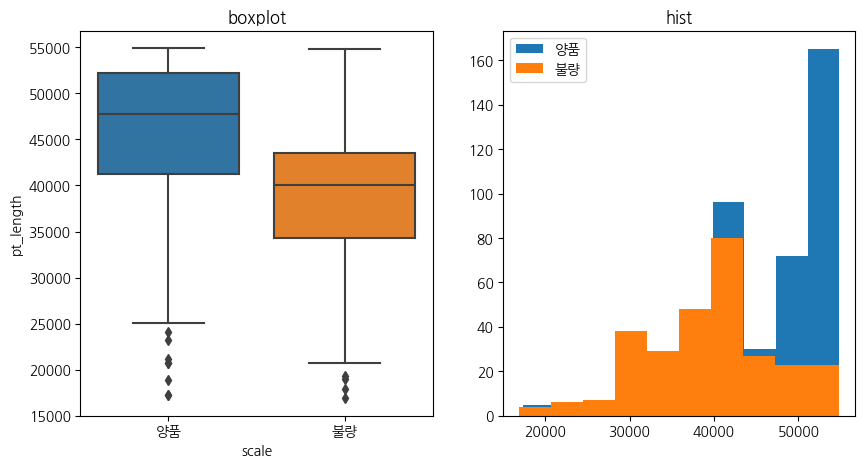

In [88]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'pt_length', data = df_C)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_C[df_C['scale'] == '양품']['pt_length'] , label = '양품')
plt.hist(df_C[df_C['scale'] == '불량']['pt_length'], label = '불량')
plt.legend()
plt.title('hist')

In [89]:
df_C[(df_C['scale'] == '불량') & (df['pt_length'] <14000)]

<ipython-input-89-e659c0929a0c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_C[(df_C['scale'] == '불량') & (df['pt_length'] <14000)]


,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group


In [90]:
df_C = df_C[(df['pt_length'] >14000)]

<ipython-input-90-508015161385>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_C = df_C[(df['pt_length'] >14000)]


Text(0.5, 1.0, 'hist')

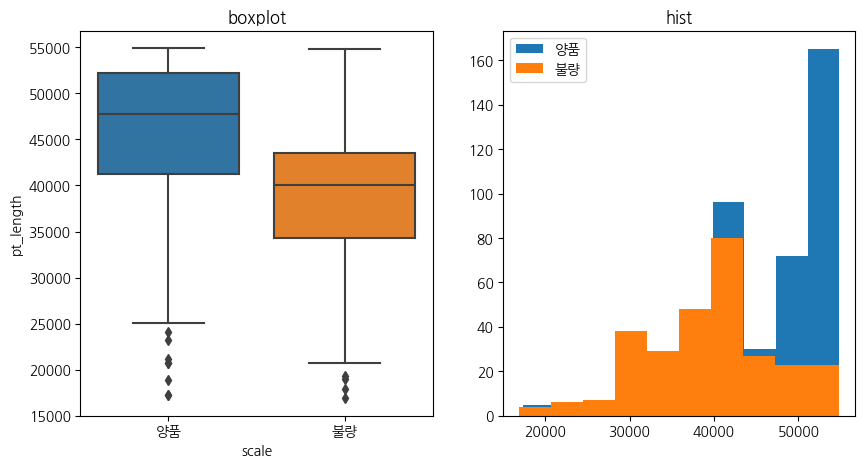

In [91]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'pt_length', data = df_C)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_C[df_C['scale'] == '양품']['pt_length'] , label = '양품')
plt.hist(df_C[df_C['scale'] == '불량']['pt_length'], label = '불량')
plt.legend()
plt.title('hist')

> fur_heat_temp

Text(0.5, 1.0, 'hist')

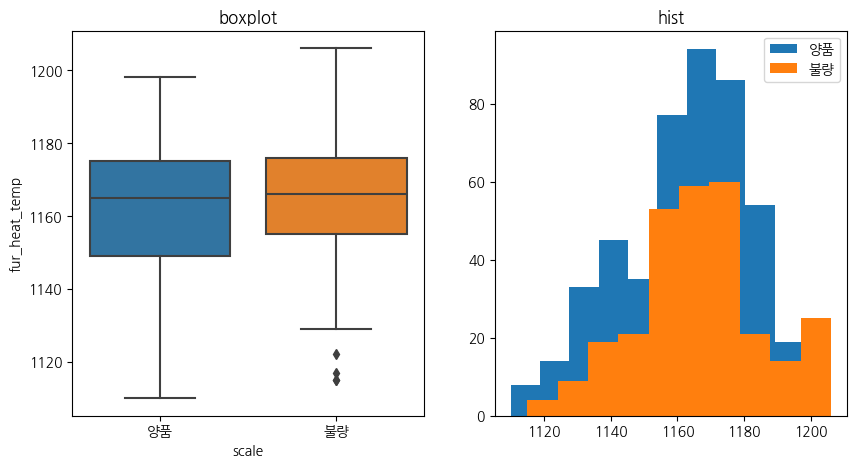

In [92]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_heat_temp', data = df_C)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_C[df_C['scale'] == '양품']['fur_heat_temp'] , label = '양품')
plt.hist(df_C[df_C['scale'] == '불량']['fur_heat_temp'], label = '불량')
plt.legend()
plt.title('hist')

> fur_heat_time

Text(0.5, 1.0, 'hist')

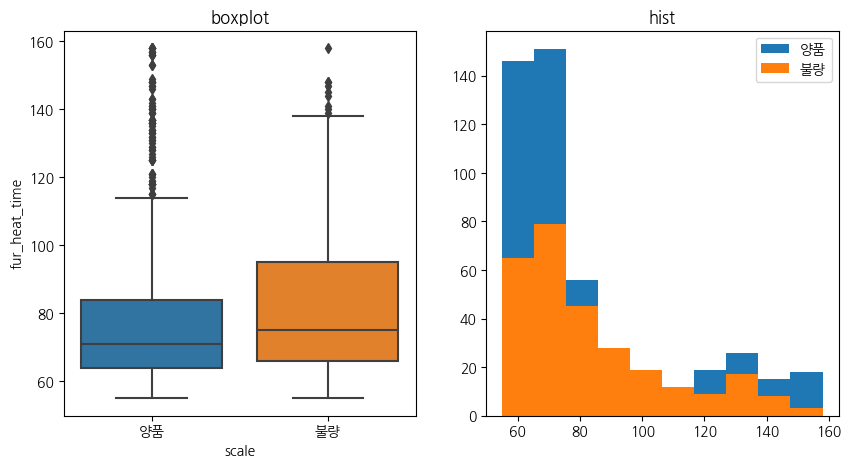

In [93]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_heat_time', data = df_C)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_C[df_C['scale'] == '양품']['fur_heat_time'] , label = '양품')
plt.hist(df_C[df_C['scale'] == '불량']['fur_heat_time'], label = '불량')
plt.legend()
plt.title('hist')

> fur_soak_temp

Text(0.5, 1.0, 'hist')

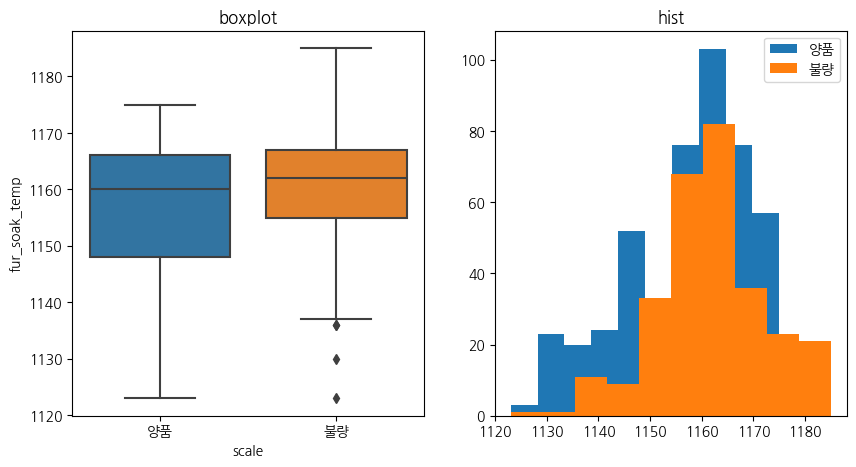

In [94]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_soak_temp', data = df_C)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_C[df_C['scale'] == '양품']['fur_soak_temp'] , label = '양품')
plt.hist(df_C[df_C['scale'] == '불량']['fur_soak_temp'], label = '불량')
plt.legend()
plt.title('hist')

> fur_soak_time

Text(0.5, 1.0, 'hist')

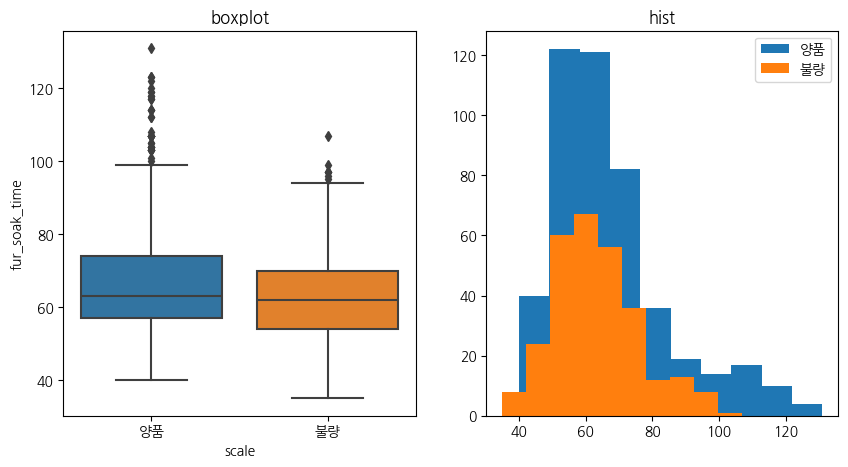

In [95]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_soak_time', data = df_C)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_C[df_C['scale'] == '양품']['fur_soak_time'] , label = '양품')
plt.hist(df_C[df_C['scale'] == '불량']['fur_soak_time'], label = '불량')
plt.legend()
plt.title('hist')

> fur_total_time

Text(0.5, 1.0, 'hist')

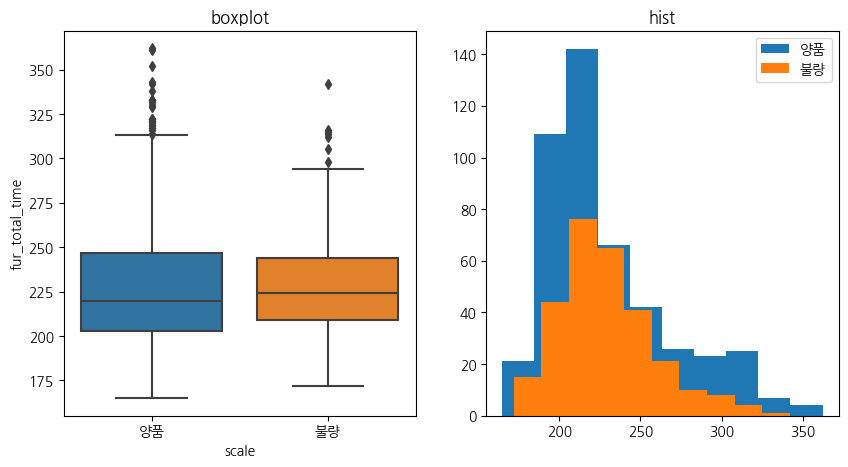

In [96]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_total_time', data = df_C)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_C[df_C['scale'] == '양품']['fur_total_time'] , label = '양품')
plt.hist(df_C[df_C['scale'] == '불량']['fur_total_time'], label = '불량')
plt.legend()
plt.title('hist')

> fur_ex_temp

Text(0.5, 1.0, 'hist')

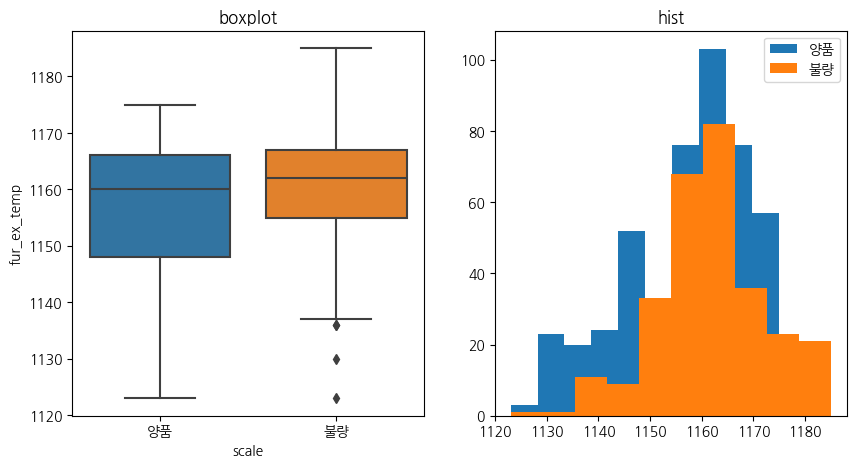

In [97]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_ex_temp', data = df_C)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_C[df_C['scale'] == '양품']['fur_ex_temp'] , label = '양품')
plt.hist(df_C[df_C['scale'] == '불량']['fur_ex_temp'], label = '불량')
plt.legend()
plt.title('hist')

> rolling_temp

Text(0.5, 1.0, 'hist')

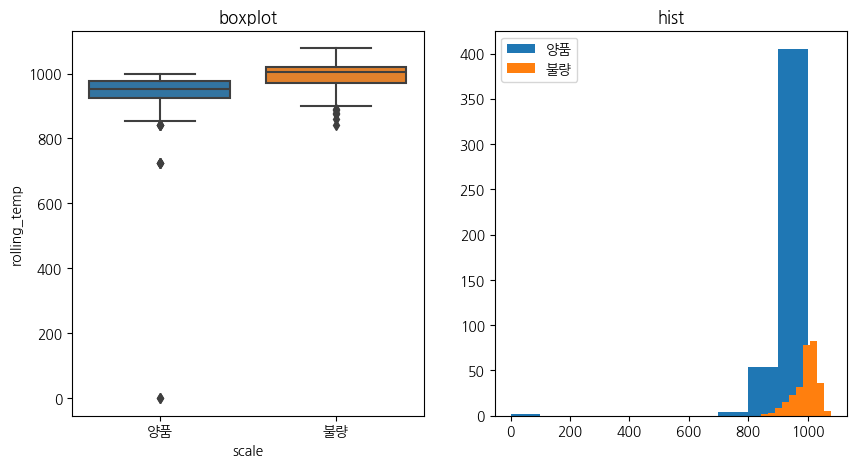

In [98]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'rolling_temp', data = df_C)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_C[df_C['scale'] == '양품']['rolling_temp'] , label = '양품')
plt.hist(df_C[df_C['scale'] == '불량']['rolling_temp'], label = '불량')
plt.legend()
plt.title('hist')

In [99]:
df_C = df_C[df['rolling_temp'] >=800]

<ipython-input-99-a0adf3c55cd1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_C = df_C[df['rolling_temp'] >=800]


Text(0.5, 1.0, 'hist')

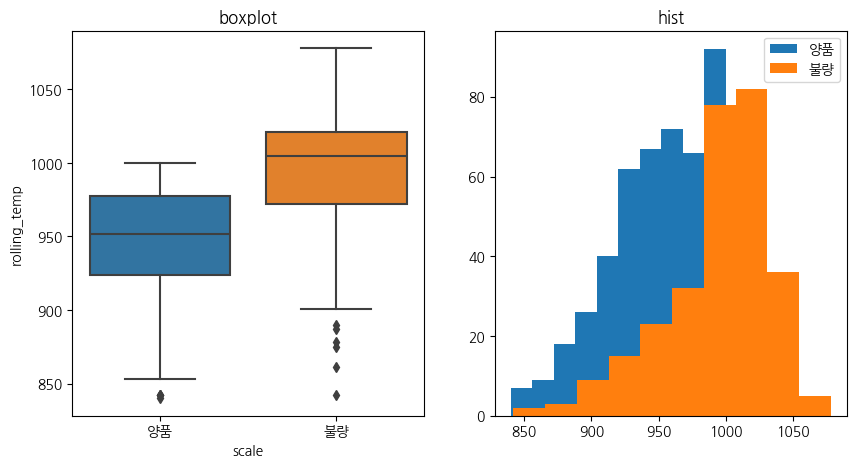

In [100]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'rolling_temp', data = df_C)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_C[df_C['scale'] == '양품']['rolling_temp'] , label = '양품')
plt.hist(df_C[df_C['scale'] == '불량']['rolling_temp'], label = '불량')
plt.legend()
plt.title('hist')

> descaling_count

Text(0.5, 1.0, 'hist')

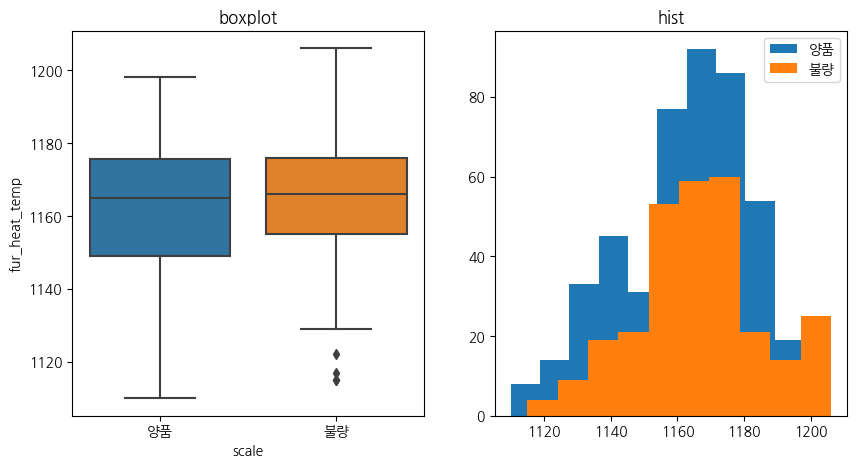

In [101]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_heat_temp', data = df_C)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_C[df_C['scale'] == '양품']['fur_heat_temp'] , label = '양품')
plt.hist(df_C[df_C['scale'] == '불량']['fur_heat_temp'], label = '불량')
plt.legend()
plt.title('hist')

### 탐색적 기법
> 데이터 검정
- 카이제곱 : 범주형목표변수랑 범주형 설명변수
- 상관부석 : 범주형 목표변수랑 연속형 설명변수

In [110]:
df_C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 117 to 999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            744 non-null    object
 1   spec_long        744 non-null    object
 2   spec_country     744 non-null    object
 3   steel_kind       744 non-null    object
 4   pt_thick         744 non-null    int64 
 5   pt_width         744 non-null    int64 
 6   pt_length        744 non-null    int64 
 7   hsb              744 non-null    object
 8   fur_no           744 non-null    object
 9   fur_input_row    744 non-null    object
 10  fur_heat_temp    744 non-null    int64 
 11  fur_heat_time    744 non-null    int64 
 12  fur_soak_temp    744 non-null    int64 
 13  fur_soak_time    744 non-null    int64 
 14  fur_total_time   744 non-null    int64 
 15  fur_ex_temp      744 non-null    int64 
 16  rolling_method   744 non-null    object
 17  rolling_temp     744 non-null    

### 모델링